In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
file_path = 'G8_project.csv'
df = pd.read_csv(file_path)
print(df.head())

   x  y Mineralogy Mineralogy.1  CH1  CH2  CH3  CH4  CH5  CH6  ...  CH4087  \
0  1  1    200,200     Ilmenite    0    0    0    0    0    0  ...     NaN   
1  2  1    400,200     Ilmenite    0    0    0    0    0    0  ...     NaN   
2  3  1    600,200     Fe-Oxide    0    0    0    0    0    0  ...     NaN   
3  4  1    800,200     Fe-Oxide    0    0    0    0    0    0  ...     NaN   
4  5  1   1000,200  Fe-Silicate    0    0    0    0    0    0  ...     NaN   

   CH4088  CH4089  CH4090  CH4091  CH4092  CH4093  CH4094  CH4095  CH4096  
0     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN  

[5 rows x 4100 columns]


In [4]:
df['Mineralogy.1'].value_counts()
labels = df['Mineralogy.1']

In [5]:
columns_to_fill = ['CH' + str(i) for i in range(1, 4097)]
df[columns_to_fill] = df[columns_to_fill].fillna(0)

In [8]:
print(df.head())

   x  y Mineralogy Mineralogy.1  CH1  CH2  CH3  CH4  CH5  CH6  ...  CH4087  \
0  1  1    200,200     Ilmenite    0    0    0    0    0    0  ...     0.0   
1  2  1    400,200     Ilmenite    0    0    0    0    0    0  ...     0.0   
2  3  1    600,200     Fe-Oxide    0    0    0    0    0    0  ...     0.0   
3  4  1    800,200     Fe-Oxide    0    0    0    0    0    0  ...     0.0   
4  5  1   1000,200  Fe-Silicate    0    0    0    0    0    0  ...     0.0   

   CH4088  CH4089  CH4090  CH4091  CH4092  CH4093  CH4094  CH4095  CH4096  
0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
1     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
2     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
3     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  
4     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0  

[5 rows x 4100 columns]


In [ ]:
# Combine data from the specified columns
subset_data = df[columns_to_fill].head(5)

for idx, row in subset_data.iterrows():
    plt.figure(figsize=(20, 12))  # Adjust the figure size as needed
    plt.stackplot(row.index, row.values, labels=row.index)
    plt.title(f'Values in Row {idx + 1}')
    plt.ylabel('Value')
    plt.xticks([])
    plt.legend(loc='upper left')
    plt.show()

In [7]:
from scipy.signal import find_peaks, savgol_filter
df_channels = df[columns_to_fill]

In [6]:
labels

0          Ilmenite
1          Ilmenite
2          Fe-Oxide
3          Fe-Oxide
4       Fe-Silicate
           ...     
7825     Background
7826     Background
7827     Background
7828     Background
7829     Background
Name: Mineralogy.1, Length: 7830, dtype: object

In [8]:
combined_df = pd.concat([df_channels, labels], axis=1)
averages = combined_df.groupby('Mineralogy.1').mean()
averages_T = averages.transpose()

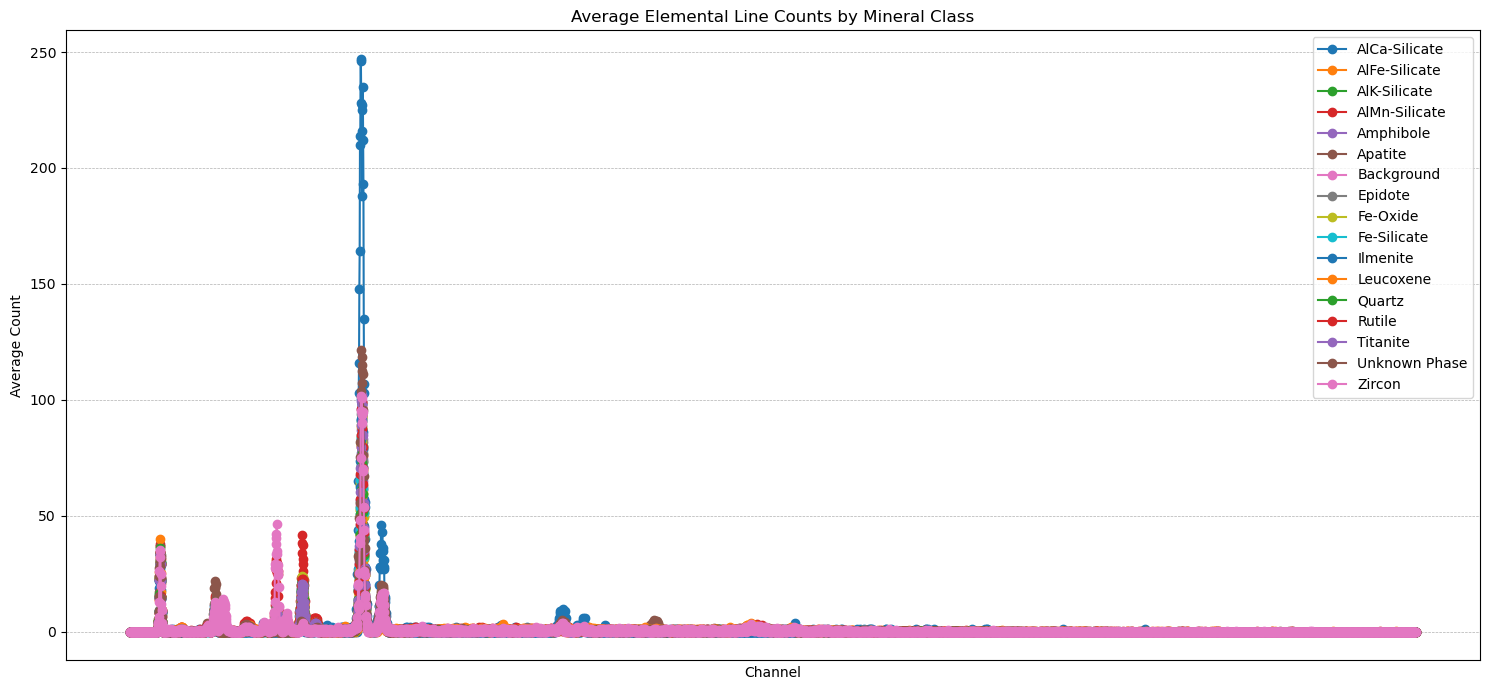

In [9]:
plt.figure(figsize=(15, 7))

for mineral in averages_T.columns:
    plt.plot(averages_T.index, averages_T[mineral], marker='o', label=mineral)

plt.title('Average Elemental Line Counts by Mineral Class')
plt.xlabel('Channel')
plt.ylabel('Average Count')
plt.legend()
plt.xticks([])  # Erase the x labels
plt.grid(True, which='both', linestyle='--', linewidth=0.5)  # Adds a grid for better visualization
plt.tight_layout()
plt.show()

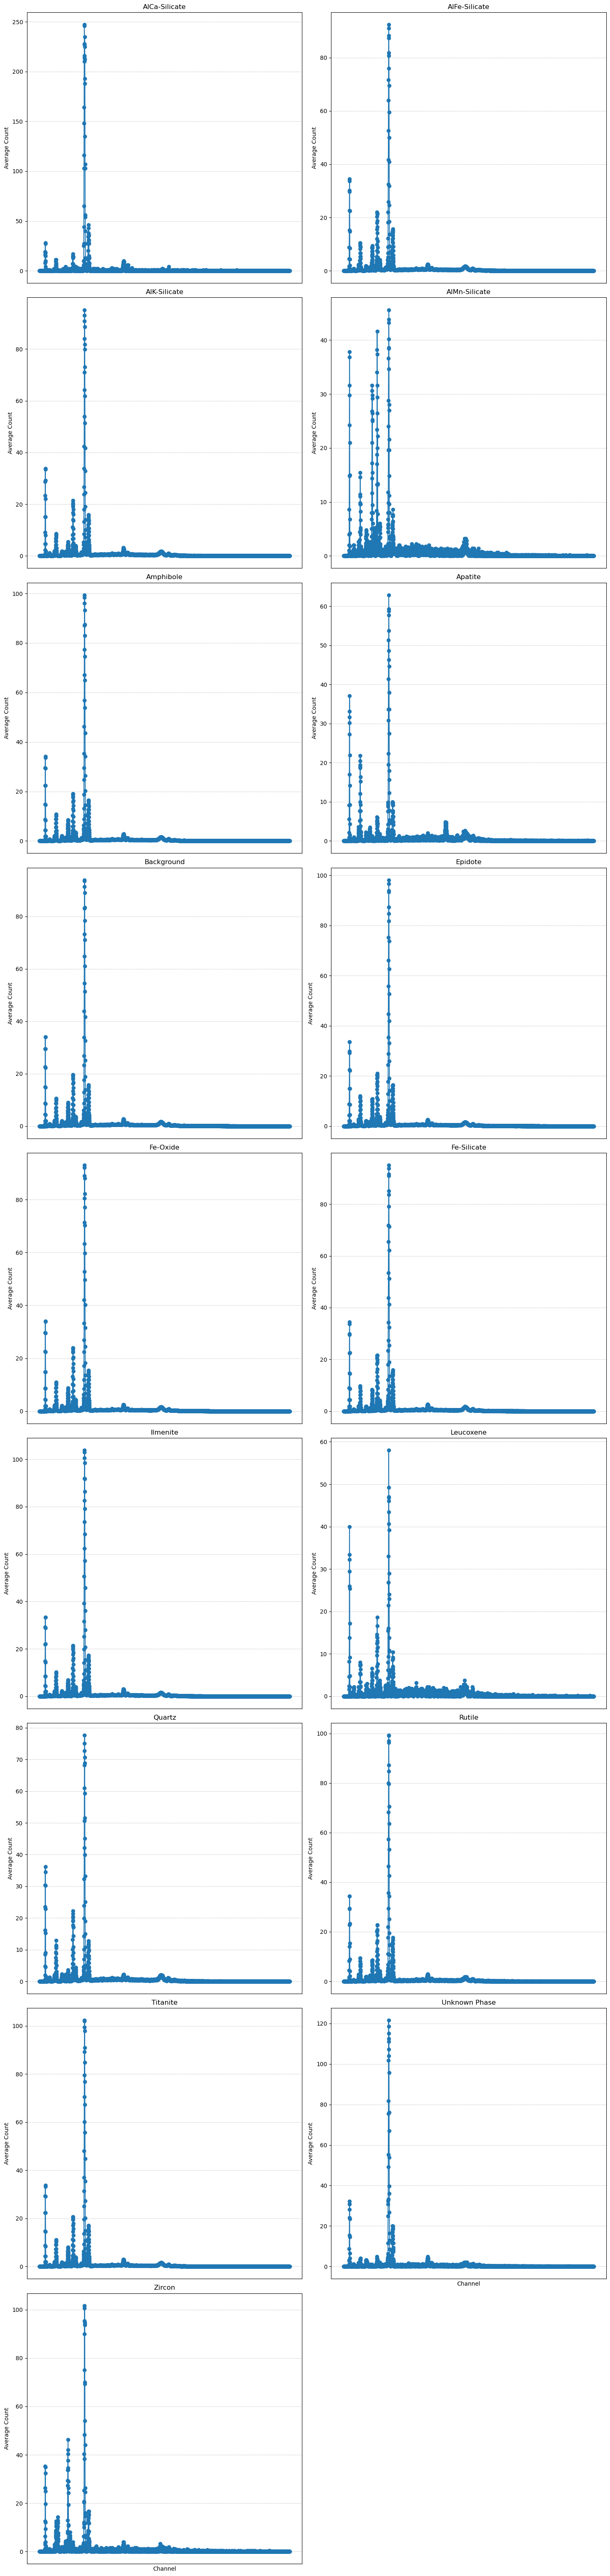

In [13]:
combined_df = pd.concat([df_channels, labels], axis=1)
averages = combined_df.groupby('Mineralogy.1').mean()
averages_T = averages.transpose()

# Determine the number of subplots needed
num_minerals = len(averages_T.columns)
cols = 2  # number of columns for subplots
rows = (num_minerals // cols) + (num_minerals % cols)  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 7*rows))  # Adjust the figure size based on rows

# Flatten the axes array in case it's 2D
axes = axes.ravel()

for idx, mineral in enumerate(averages_T.columns):
    ax = axes[idx]
    ax.plot(averages_T.index, averages_T[mineral], marker='o', label=mineral)
    ax.set_title(mineral)
    ax.set_ylabel('Average Count')
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)

    # Hide x ticks as per your initial code
    ax.set_xticks([])
    
    # Only set "Channel" xlabel on the last row for clarity
    if idx >= (num_minerals - cols):
        ax.set_xlabel('Channel')

# Remove any unused subplots
for idx in range(num_minerals, rows*cols):
    fig.delaxes(axes[idx])

plt.tight_layout()
plt.show()


In [10]:
sums = combined_df.groupby('Mineralogy.1').sum()

<Figure size 2000x1500 with 0 Axes>

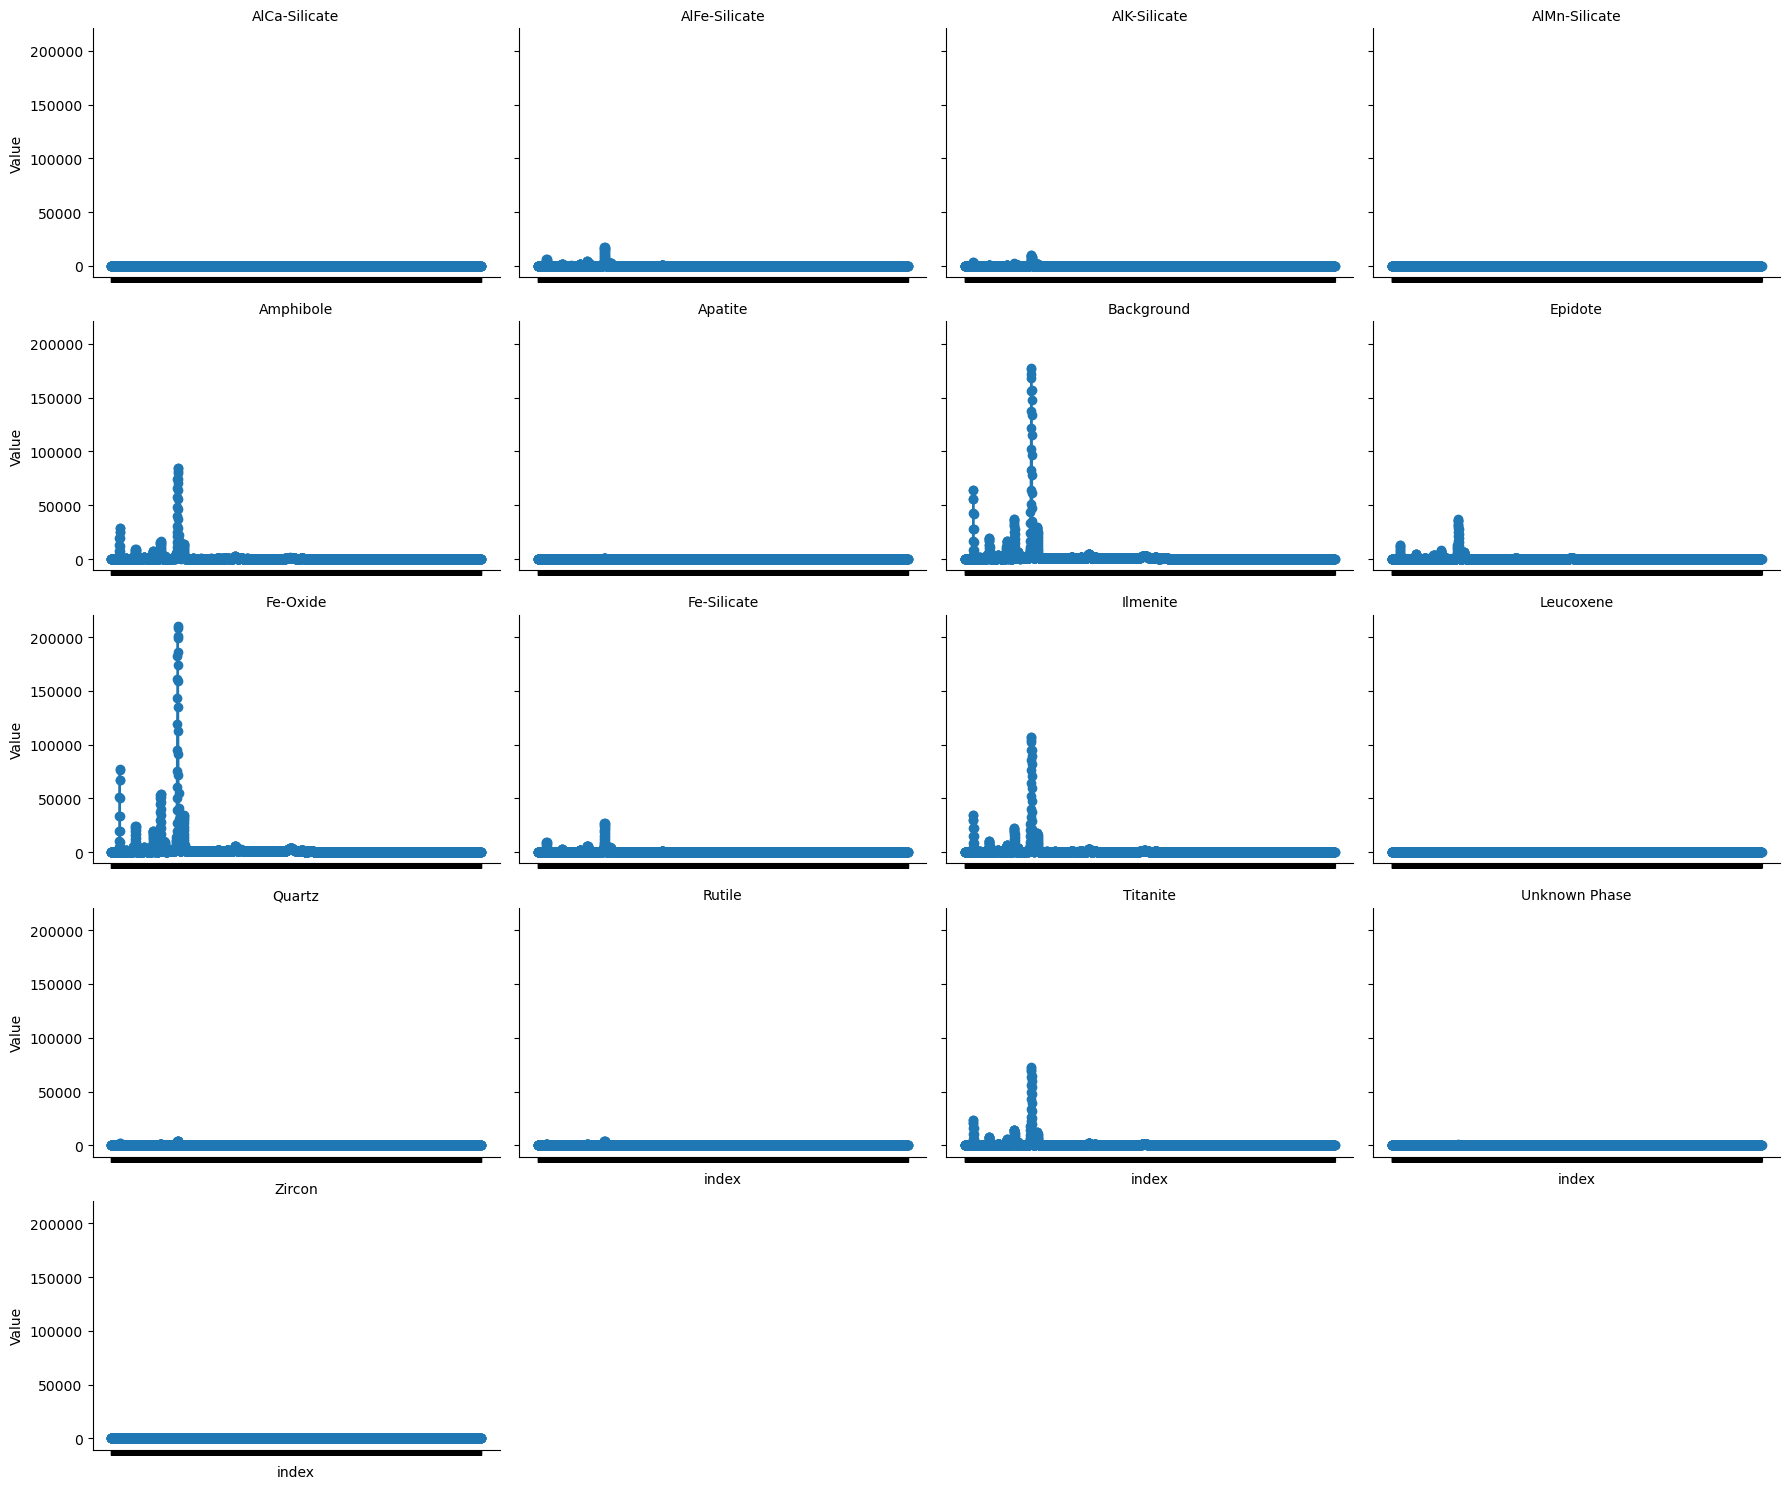

In [11]:
import seaborn as sns

# Transpose for easier plotting with seaborn
sums_T = sums.transpose().reset_index()

# Melt the dataframe to have columns: Channel, Mineral, Value
melted_sums = pd.melt(sums_T, id_vars=['index'], value_vars=sums_T.columns[1:], 
                      var_name='Mineral', value_name='Value')

plt.figure(figsize=(20, 15))

# Create a FacetGrid to plot each mineral's curve in its own subplot
g = sns.FacetGrid(melted_sums, col="Mineral", col_wrap=4, height=3, aspect=1.5)
g = g.map(plt.plot, "index", "Value", marker="o")

g.set_titles("{col_name}")
g.set_xticklabels(rotation=90)

plt.tight_layout()
plt.show()

In [56]:
# 2. Smoothing using Savitzky-Golay filter:
window_length = 51  # Needs to be an odd number, adjust based on your data's resolution
polyorder = 3  # Degree of polynomial fit
df_smooth = df_channels.apply(lambda x: savgol_filter(x, window_length, polyorder), axis=1, result_type='expand')

In [57]:
# 3. Baseline Correction - subtracting the minimum value for simplicity
df_baseline_corrected = df_smooth.sub(df_smooth.min(axis=1), axis=0)

In [58]:
# 4. Normalization: Max-Min scaling
df_normalized = (df_baseline_corrected - df_baseline_corrected.min()) / (df_baseline_corrected.max() - df_baseline_corrected.min())

In [59]:
# 5. Peak Detection:
prominence_val = 0.05  # A parameter to adjust, defines prominence of detected peaks
peaks_indices = df_normalized.apply(lambda x: find_peaks(x, prominence=prominence_val)[0], axis=1)

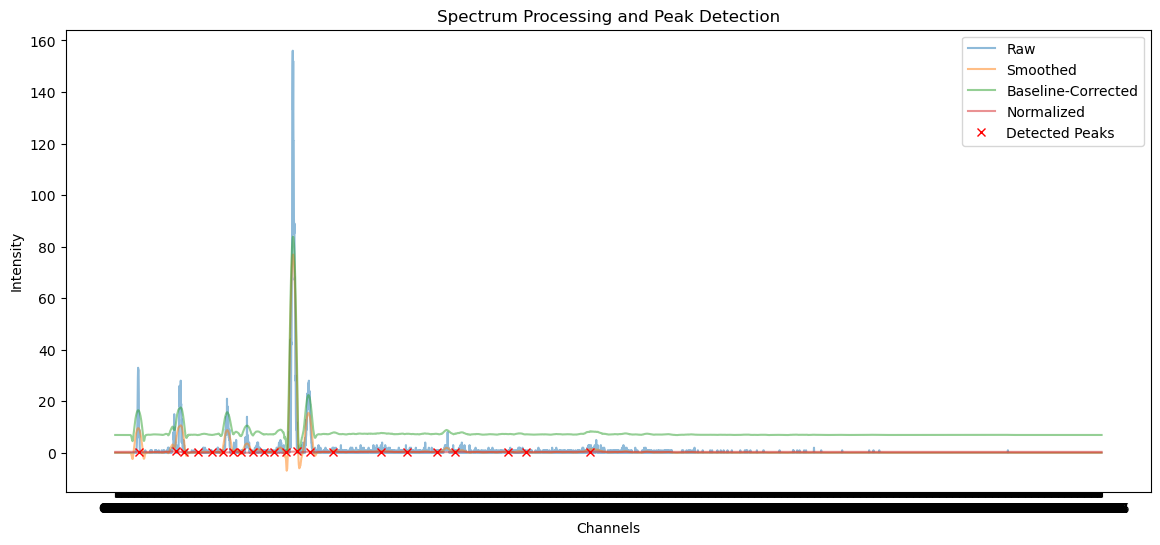

In [61]:
# Visualization
random_idx = np.random.randint(0, df_channels.shape[0])
sample_spectrum = df_channels.iloc[random_idx]
sample_smooth = df_smooth.iloc[random_idx]
sample_corrected = df_baseline_corrected.iloc[random_idx]
sample_normalized = df_normalized.iloc[random_idx]
sample_peaks = peaks_indices[random_idx]

plt.figure(figsize=(14, 6))
plt.plot(sample_spectrum, label='Raw', alpha=0.5)
plt.plot(sample_smooth, label='Smoothed', alpha=0.5)
plt.plot(sample_corrected, label='Baseline-Corrected', alpha=0.5)
plt.plot(sample_normalized, label='Normalized', alpha=0.5)
plt.plot(sample_peaks, sample_normalized.iloc[sample_peaks], "x", label='Detected Peaks', color='red')
plt.title('Spectrum Processing and Peak Detection')
plt.xlabel('Channels')
plt.ylabel('Intensity')
plt.legend()
plt.show()

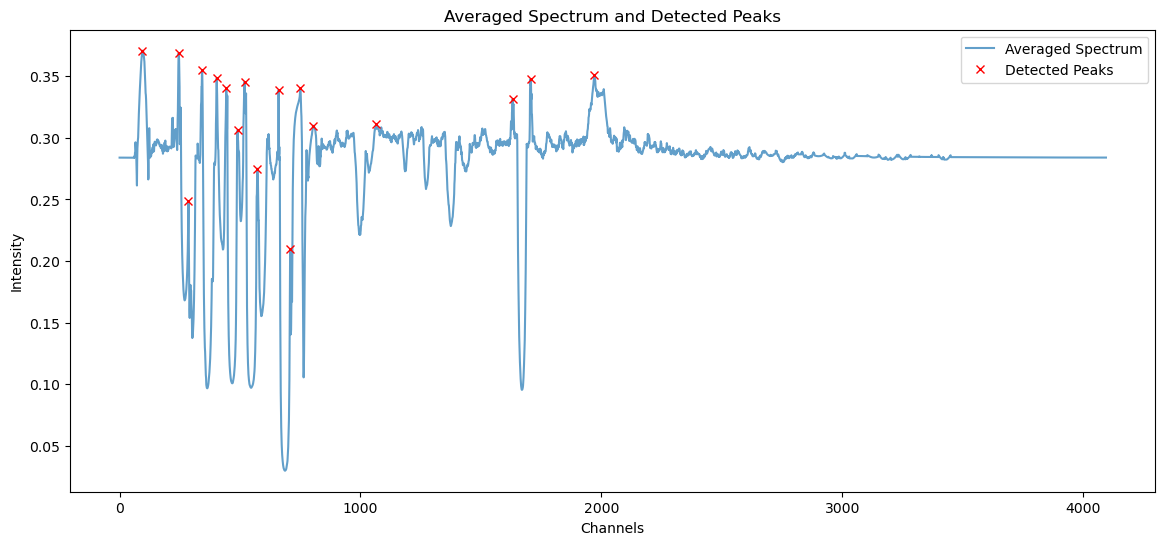

In [62]:
average_spectrum = df_normalized.mean(axis=0)

prominence_val = 0.05  # Adjust as needed
peak_locations, _ = find_peaks(average_spectrum, prominence=prominence_val)

plt.figure(figsize=(14, 6))
plt.plot(average_spectrum, label='Averaged Spectrum', alpha=0.7)
plt.plot(peak_locations, average_spectrum.iloc[peak_locations], "x", label='Detected Peaks', color='red')
plt.title('Averaged Spectrum and Detected Peaks')
plt.xlabel('Channels')
plt.ylabel('Intensity')
plt.legend()
plt.show()

In [63]:
df_filtered = df_normalized.iloc[:, peak_locations]
df_filtered.head(5)

,95,245,286,343,403,443,490,519,572,660,708,750,803,1065,1632,1706,1971
0,0.392700,0.378321,0.400331,0.381888,0.376712,0.337748,0.349601,0.428908,0.316127,0.368521,0.318738,0.441819,0.397572,0.338837,0.374626,0.377066,0.376177
1,0.431916,0.310233,0.502842,0.405468,0.385217,0.376084,0.361758,0.405423,0.310320,0.388659,0.081218,0.450374,0.394487,0.347822,0.385780,0.383769,0.422135
2,0.204704,0.157348,0.117187,0.131217,0.118809,0.169243,0.068243,0.174080,0.131586,0.118108,0.080344,0.120707,0.103246,0.078556,0.127954,0.116999,0.129992
3,0.425477,0.449879,0.361648,0.393644,0.364272,0.382751,0.347975,0.408723,0.335603,0.387246,0.243500,0.486259,0.456844,0.342192,0.359398,0.383324,0.392450
4,0.409466,0.564892,0.400277,0.456919,0.427626,0.423475,0.437747,0.465313,0.358625,0.432057,0.259307,0.541658,0.477525,0.421043,0.455970,0.455070,0.477732


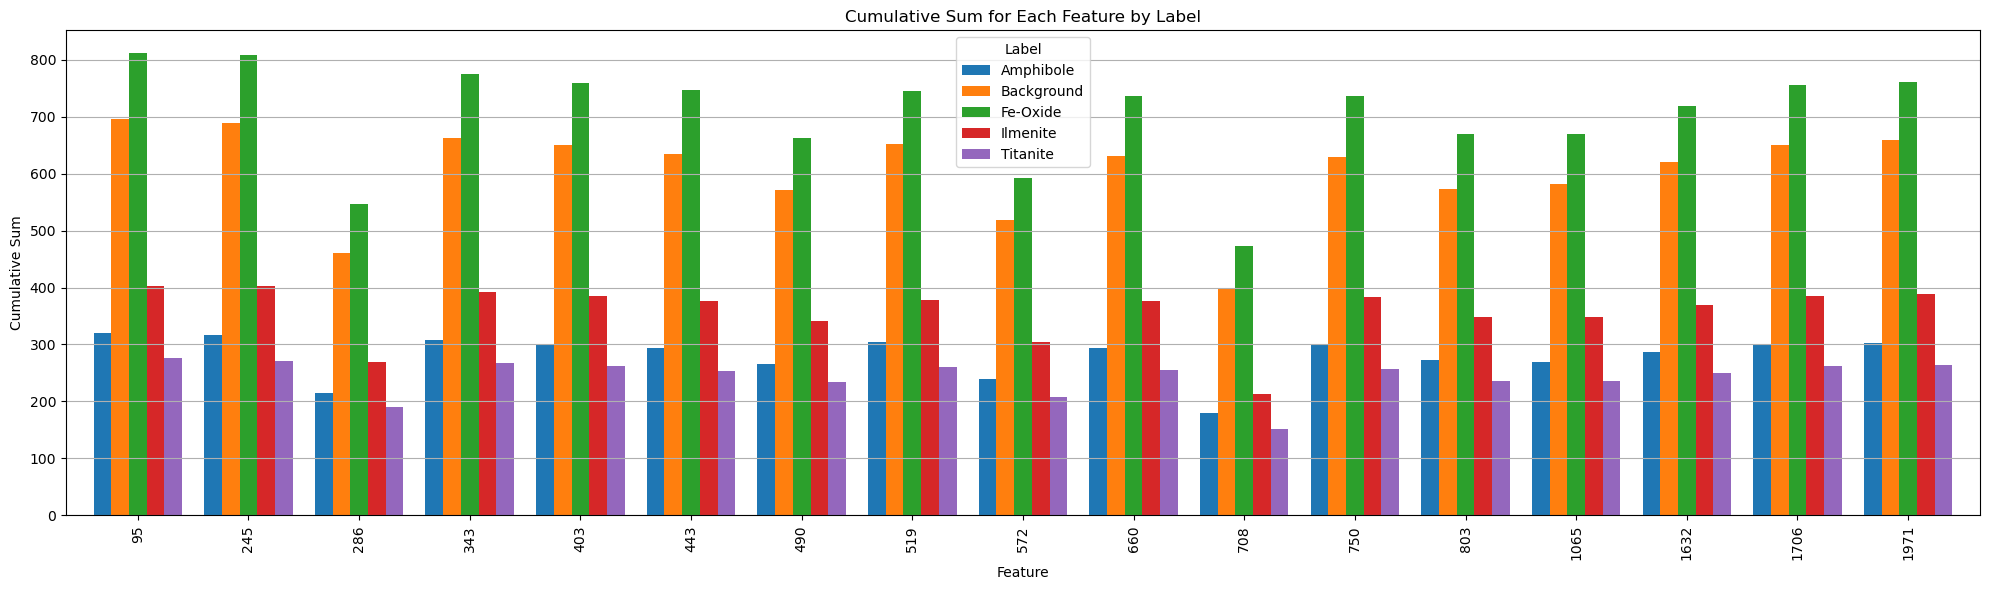

In [89]:
top_labels = labels.value_counts().index[:5]
filtered_indices = labels[labels.isin(top_labels)].index
df_top_labels = df_filtered.loc[filtered_indices]
labels_top = labels[labels.isin(top_labels)]

grouped_sums = df_top_labels.groupby(labels_top).sum().transpose()  # transpose to have features as rows

ax = grouped_sums.plot(kind='bar', figsize=(20, 6), width=0.8)
plt.title('Cumulative Sum for Each Feature by Label')
plt.xlabel('Feature')
plt.ylabel('Cumulative Sum')
plt.xticks(rotation=90)  # Rotate feature labels for better readability
plt.grid(axis='y')
plt.tight_layout()  # Adjust layout for better display
plt.legend(title='Label')
plt.show()

In [79]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(labels)

X_train, X_test, y_train, y_test = train_test_split(df_filtered, y_encoded, test_size=0.2, random_state=42)

In [80]:
from sklearn.utils.class_weight import compute_class_weight

unique_classes = np.unique(labels)
class_weights = compute_class_weight('balanced', classes=unique_classes, y=labels)

weights = {class_label: weight for class_label, weight in zip(unique_classes, class_weights)}
sample_weights = np.array([weights[label] for label in y_train])

KeyError: 6

In [92]:
unique_classes

array(['AlCa-Silicate', 'AlFe-Silicate', 'AlK-Silicate', 'AlMn-Silicate',
       'Amphibole', 'Apatite', 'Background', 'Epidote', 'Fe-Oxide',
       'Fe-Silicate', 'Ilmenite', 'Leucoxene', 'Quartz', 'Rutile',
       'Titanite', 'Unknown Phase', 'Zircon'], dtype=object)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4335
[LightGBM] [Info] Number of data points in the train set: 6264, number of used features: 17
[LightGBM] [Info] Start training from score -2.635586
[LightGBM] [Info] Start training from score -2.844434
[LightGBM] [Info] Start training from score -2.904576
[LightGBM] [Info] Start training from score -2.858729
[LightGBM] [Info] Start training from score -2.849716
[LightGBM] [Info] Start training from score -2.740946
[LightGBM] [Info] Start training from score -2.859260
[LightGBM] [Info] Start training from score -2.866698
[LightGBM] [Info] Start training from score -2.848171
[LightGBM] [Info] Start training from score -2.871975
[LightGBM] [Info] Start training from score -2.873069
[LightGBM] [Info] Start training from score -2.858729
[LightGBM] [Info] Start training from score -2.755730
[LightG

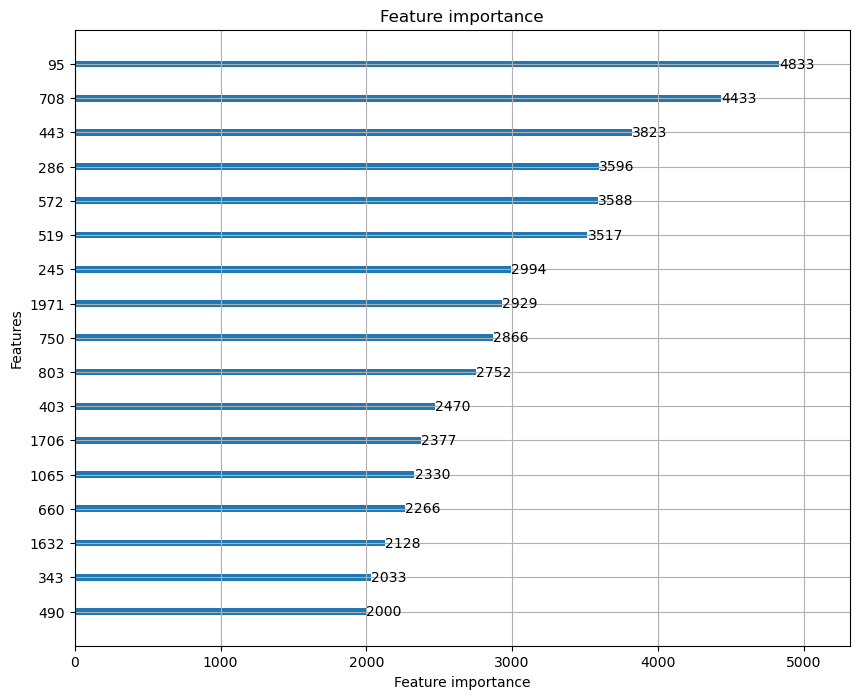

In [93]:
import lightgbm as lgb

train_data = lgb.Dataset(X_train, label=y_train, weight=sample_weights)
test_data = lgb.Dataset(X_test, label=y_test)

params = {
    'objective': 'multiclass',
    'num_class': len(unique_classes),
    'boosting_type': 'gbdt',
    'metric': 'multi_logloss',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
}

num_round = 100
bst = lgb.train(params, train_data, num_round, valid_sets=[test_data])

lgb.plot_importance(bst, importance_type='split', figsize=(10, 8))
plt.show()

In [94]:
y_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_pred_max = [np.argmax(val) for val in y_pred]

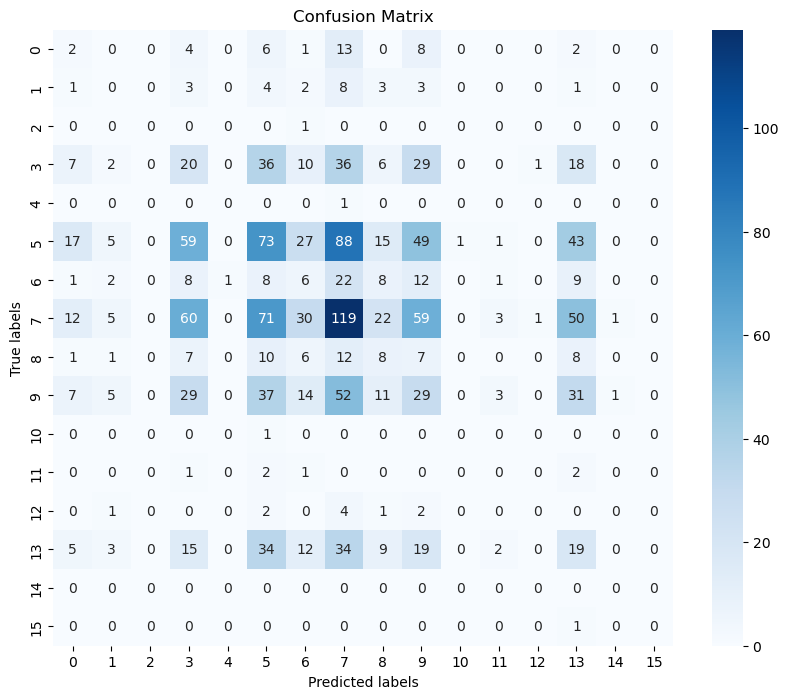

In [95]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred_max)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [96]:
print(classification_report(y_test, y_pred_max))

              precision    recall  f1-score   support

           1       0.04      0.06      0.04        36
           2       0.00      0.00      0.00        25
           3       0.00      0.00      0.00         1
           4       0.10      0.12      0.11       165
           5       0.00      0.00      0.00         1
           6       0.26      0.19      0.22       378
           7       0.05      0.08      0.06        78
           8       0.31      0.27      0.29       433
           9       0.10      0.13      0.11        60
          10       0.13      0.13      0.13       219
          11       0.00      0.00      0.00         1
          12       0.00      0.00      0.00         6
          13       0.00      0.00      0.00        10
          14       0.10      0.12      0.11       152
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         1

    accuracy                           0.18      1566
   macro avg       0.07   

C:\Users\61596\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\61596\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\61596\miniconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\61596\miniconda3\lib\site-packages\sklearn\metrics\

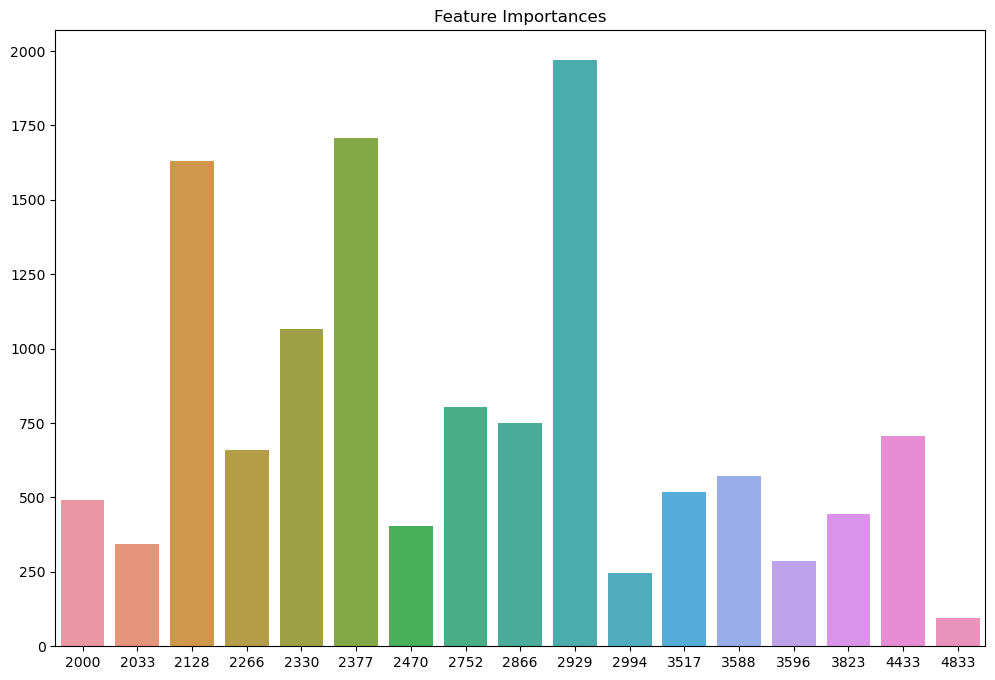

In [97]:
feature_importances = bst.feature_importance()

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=df_filtered.columns)
plt.title('Feature Importances')
plt.show()


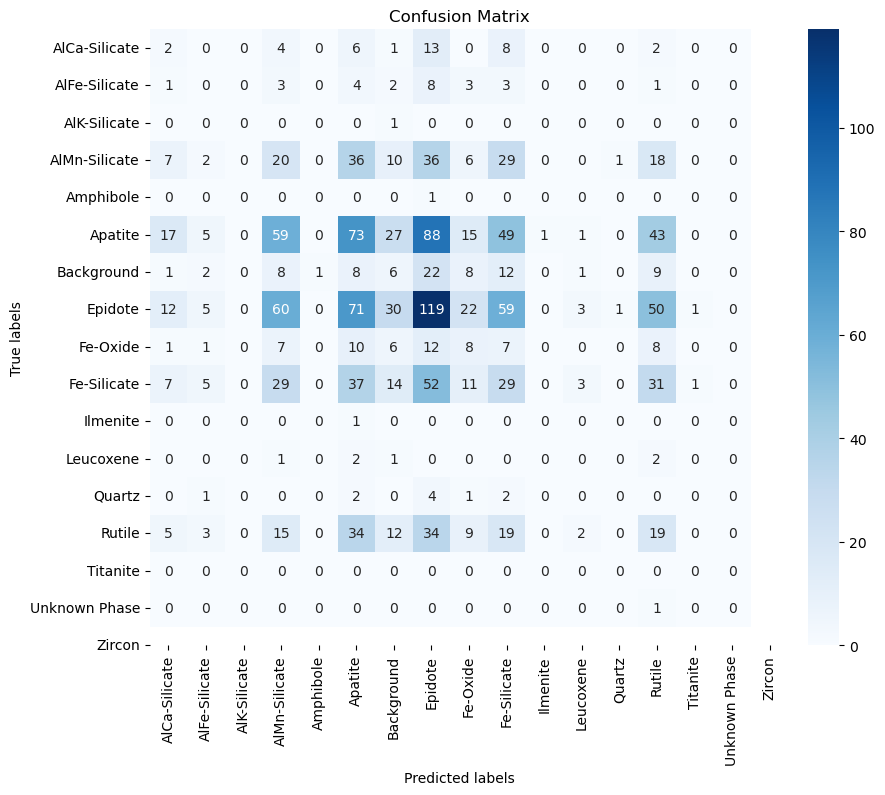

In [98]:
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_max)

# Plot using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

X = df[columns_to_fill]
y = df['Mineralogy.1']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2)

In [ ]:
## from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Apply PCA
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

# Get explained variance
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Find number of components for 95% variance
num_components_95 = np.argmax(cumulative_variance > 0.95) + 1
print(f"Number of components for 95% variance: {num_components_95}")

# Visualize the variance explained
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.axvline(x=num_components_95, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

In [20]:
# Convert y_train to DataFrame
y_train_df = pd.DataFrame(y_train, columns=['labels'])

# Calculate the class frequencies
class_freq = y_train_df['labels'].value_counts(normalize=True)

# Calculate inverse weights
class_weights = 1 / class_freq

# Normalize weights to ensure the mean weight is 1
class_weights /= class_weights.mean()

# Map weights to the observations based on y_train_df
weights = y_train_df['labels'].map(class_weights).values


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.349059 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1044480
[LightGBM] [Info] Number of data points in the train set: 6264, number of used features: 4096
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[LightGBM] [Info] Start training from score -2.772589
[

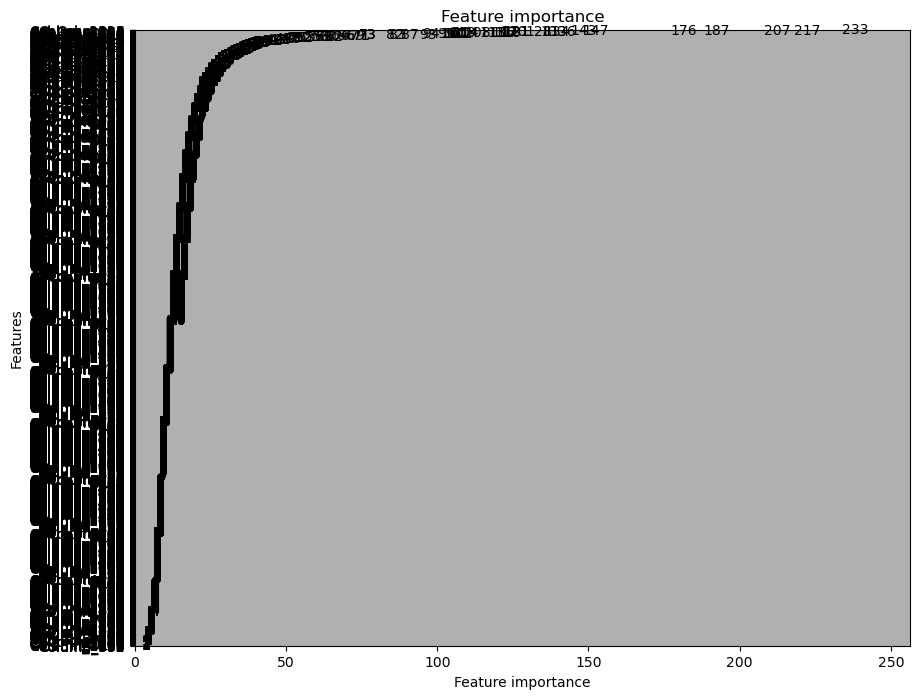

In [26]:
import lightgbm as lgb

# Convert your X_train_pca and y_train arrays to LightGBM Dataset
train_data = lgb.Dataset(X_train_pca, label=y_train, weight=weights)

# Set the parameters
params = {
    'objective': 'multiclass',  # or 'multiclass' for multiclass problem
    'metric': 'multi_logloss',  # or 'multi_logloss' for multiclass problem
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'num_class': len(label_encoder.classes_) 
}

# Train the model
num_round = 100  # number of boosting rounds
bst = lgb.train(params, train_data, num_round)

# Feature Importance Visualization
lgb.plot_importance(bst, importance_type='split', figsize=(10, 8))
plt.show()


In [27]:
import numpy as np
from sklearn.metrics import accuracy_score

# Predict class probabilities for X_test
y_pred_probs = bst.predict(X_test)

# Convert probabilities to class predictions
y_pred = [np.argmax(value) for value in y_pred_probs]

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.2452


In [23]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
# Initialize the TabNetClassifier
clf = TabNetClassifier(
    n_d=64, n_a=64, n_steps=5,
    gamma=1.5, n_independent=2, n_shared=2,
    cat_emb_dim=1,
    lambda_sparse=1e-4, momentum=0.3, clip_value=2.,
    optimizer_fn=torch.optim.Adam,
    optimizer_params=dict(lr=2e-2),
    scheduler_params = {"gamma": 0.95,
                     "step_size": 20},
    scheduler_fn=torch.optim.lr_scheduler.StepLR, epsilon=1e-15)

# Train the classifier
clf.fit(
    X_train=X_train_pca,
    y_train=y_train,
    max_epochs=100,
)

# Make predictions
predictions = clf.predict(X_test)

# Evaluate the model
accuracy = (predictions == y_test).mean()
print(f"Accuracy: {accuracy:.4f}")

C:\Users\61596\miniconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cuda
  warnings.warn(f"Device used : {self.device}")
C:\Users\61596\miniconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:687: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 4.01354 |  0:00:04s
epoch 1  | loss: 2.74152 |  0:00:05s
epoch 2  | loss: 2.39532 |  0:00:06s
epoch 3  | loss: 2.20859 |  0:00:08s
epoch 4  | loss: 2.12038 |  0:00:09s
epoch 5  | loss: 2.05497 |  0:00:10s
epoch 6  | loss: 2.01198 |  0:00:11s
epoch 7  | loss: 1.98149 |  0:00:12s
epoch 8  | loss: 1.96428 |  0:00:13s
epoch 9  | loss: 1.94265 |  0:00:14s
epoch 10 | loss: 1.93021 |  0:00:15s
epoch 11 | loss: 1.92366 |  0:00:16s
epoch 12 | loss: 1.91897 |  0:00:17s
epoch 13 | loss: 1.9231  |  0:00:18s
epoch 14 | loss: 1.91854 |  0:00:19s
epoch 15 | loss: 1.92086 |  0:00:21s
epoch 16 | loss: 1.92679 |  0:00:22s
epoch 17 | loss: 1.91956 |  0:00:23s
epoch 18 | loss: 1.91163 |  0:00:24s
epoch 19 | loss: 1.92296 |  0:00:25s
epoch 20 | loss: 1.91365 |  0:00:26s
epoch 21 | loss: 1.90847 |  0:00:27s
epoch 22 | loss: 1.91266 |  0:00:28s
epoch 23 | loss: 1.90038 |  0:00:29s
epoch 24 | loss: 1.9021  |  0:00:30s
epoch 25 | loss: 1.90242 |  0:00:31s
epoch 26 | loss: 1.89161 |  0:00:32s
e

In [30]:
import os
n_estimators = 1000 if not os.getenv("CI", False) else 20

In [38]:
from xgboost import XGBClassifier

clf_xgb = XGBClassifier(max_depth=8,
    learning_rate=0.1,
    n_estimators=n_estimators,
    verbosity=0,
    silent=None,
    objective="multi:softmax",
    booster='gbtree',
    n_jobs=-1,
    nthread=None,
    gamma=0,
    min_child_weight=1,
    max_delta_step=0,
    subsample=0.7,
    colsample_bytree=1,
    colsample_bylevel=1,
    colsample_bynode=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    base_score=0.5,
    random_state=0,
    seed=None,)

clf_xgb.fit(X_train, y_train,
            verbose=10)

KeyboardInterrupt: 

In [ ]:
preds_test = np.array(clf_xgb.predict_proba(X_test))
test_acc = accuracy_score(y_pred=np.argmax(preds_test, axis=1) + 1, y_true=y_test)
print(test_acc)

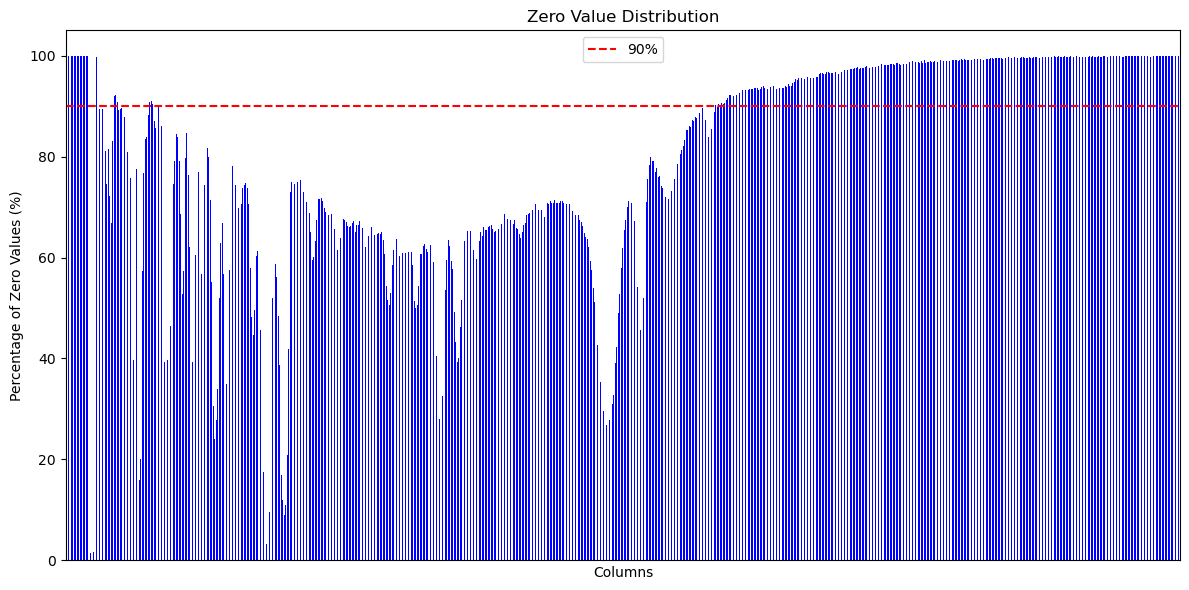

CH1       100.000000
CH2       100.000000
CH3       100.000000
CH4       100.000000
CH5       100.000000
             ...    
CH4092     99.923372
CH4093     99.948914
CH4094    100.000000
CH4095     99.846743
CH4096     99.974457
Length: 4096, dtype: float64


In [65]:
# Calculate the percentage of zero values for each column
zero_percentage = (df[columns_to_fill] == 0).mean() * 100

# Plot the distribution of zero percentages
plt.figure(figsize=(12, 6))
ax = zero_percentage.plot(kind='bar', color='blue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Zero Values (%)')
plt.title('Zero Value Distribution')
plt.xticks([])  # Remove x-axis labels
plt.axhline(y=90, color='red', linestyle='--', label='90%')
plt.legend()
plt.tight_layout()
plt.show()

# Print zero percentage for each column
print(zero_percentage)

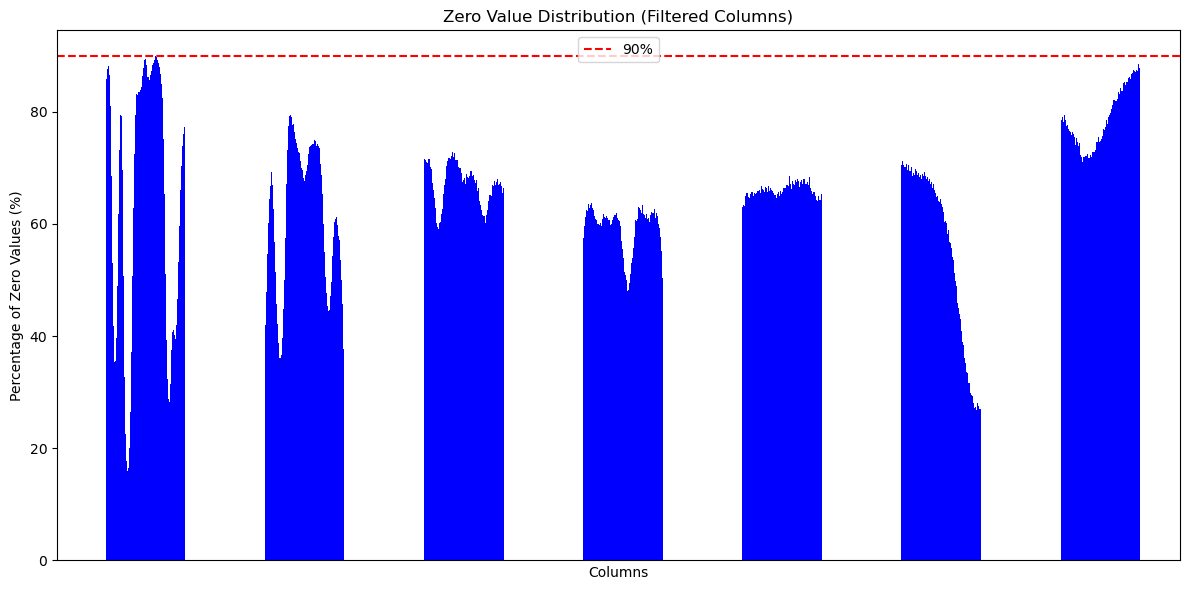

CH87      86.883780
CH88      72.068966
CH89      44.010217
CH90      14.176245
CH91       1.443167
            ...    
CH2396    89.872286
CH2401    89.846743
CH2409    89.910600
CH2413    89.910600
CH2417    89.744572
Length: 2253, dtype: float64


In [66]:
# Filter out columns with 90% or more zero values
filtered_columns = zero_percentage[zero_percentage < 90].index
filtered_data = df[filtered_columns]

# Plot the distribution of zero percentages for filtered columns
plt.figure(figsize=(12, 6))
ax = zero_percentage[filtered_columns].plot(kind='bar', color='blue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Zero Values (%)')
plt.title('Zero Value Distribution (Filtered Columns)')
plt.xticks([])  # Remove x-axis labels
plt.axhline(y=90, color='red', linestyle='--', label='90%')
plt.legend()
plt.tight_layout()
plt.show()

# Print zero percentage for each column after filtering
print(zero_percentage[filtered_columns])

Number of people needed for shared birthday probability of 0.5: 23
Number of people needed for consecutive days probability of 0.5: 23


In [ ]:
list(df_channels.columns)

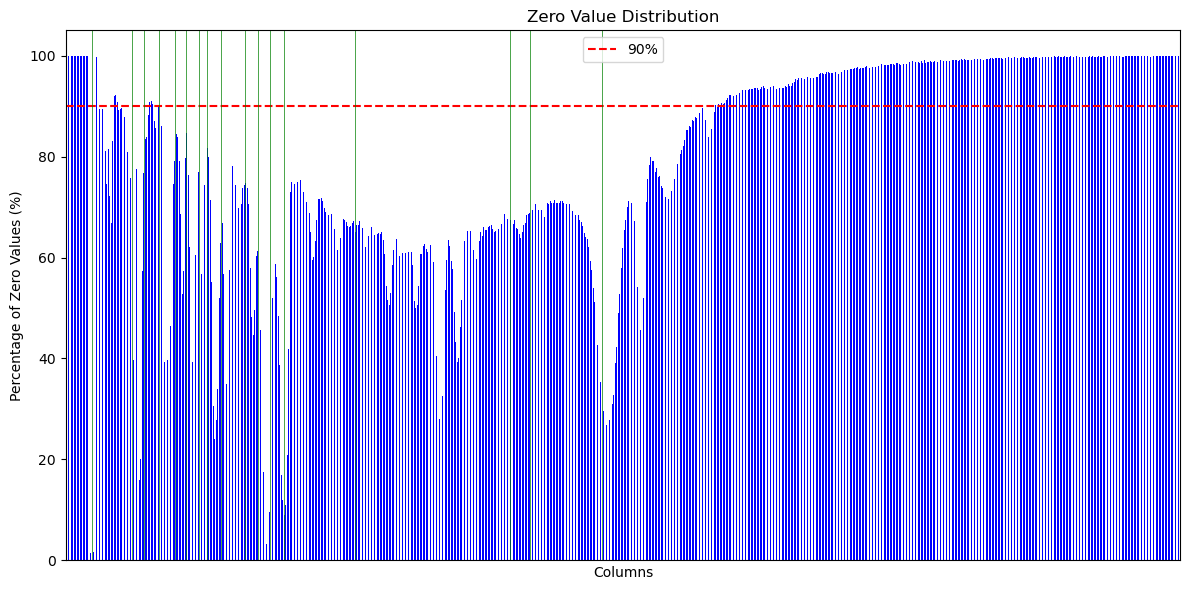

CH1       100.000000
CH2       100.000000
CH3       100.000000
CH4       100.000000
CH5       100.000000
             ...    
CH4092     99.923372
CH4093     99.948914
CH4094    100.000000
CH4095     99.846743
CH4096     99.974457
Length: 4096, dtype: float64


In [104]:
# Calculate the percentage of zero values for each column
zero_percentage = (# Calculate the percentage of zero values for each column
zero_percentage = (df_channels == 0).mean() * 100

# Prepend "CH" to the column numbers from df_filtered
filtered_columns_with_prefix = ["CH" + str(col) for col in df_filtered.columns]

# Identify the peak positions from df_filtered in df_channels
peak_positions = [list(df_channels.columns).index(column) for column in filtered_columns_with_prefix]

# Plot the distribution of zero percentages
plt.figure(figsize=(12, 6))
ax = zero_percentage.plot(kind='bar', color='blue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Zero Values (%)')
plt.title('Zero Value Distribution')
plt.xticks([])  # Remove x-axis labels for clarity

# Add a red dashed line at 90%
plt.axhline(y=90, color='red', linestyle='--', label='90%')

# Add vertical lines for the peaks from df_filtered
for peak in peak_positions:
    plt.axvline(x=peak, color='green', linestyle='-', linewidth=0.5)

plt.legend()
plt.tight_layout()
plt.show()

# Print zero percentage for each column
print(zero_percentage)
 == 0).mean() * 100

# Prepend "CH" to the column numbers from df_filtered
filtered_columns_with_prefix = ["CH" + str(col) for col in df_filtered.columns]

# Identify the peak positions from df_filtered in df_channels
peak_positions = [list(df_channels.columns).index(column) for column in filtered_columns_with_prefix]

# Plot the distribution of zero percentages
plt.figure(figsize=(12, 6))
ax = zero_percentage.plot(kind='bar', color='blue')
plt.xlabel('Columns')
plt.ylabel('Percentage of Zero Values (%)')
plt.title('Zero Value Distribution')
plt.xticks([])  # Remove x-axis labels for clarity

# Add a red dashed line at 90%
plt.axhline(y=90, color='red', linestyle='--', label='90%')

# Add vertical lines for the peaks from df_filtered
for peak in peak_positions:
    plt.axvline(x=peak, color='green', linestyle='-', linewidth=0.5)

plt.legend()
plt.tight_layout()
plt.show()

# Print zero percentage for each column
print(zero_percentage)

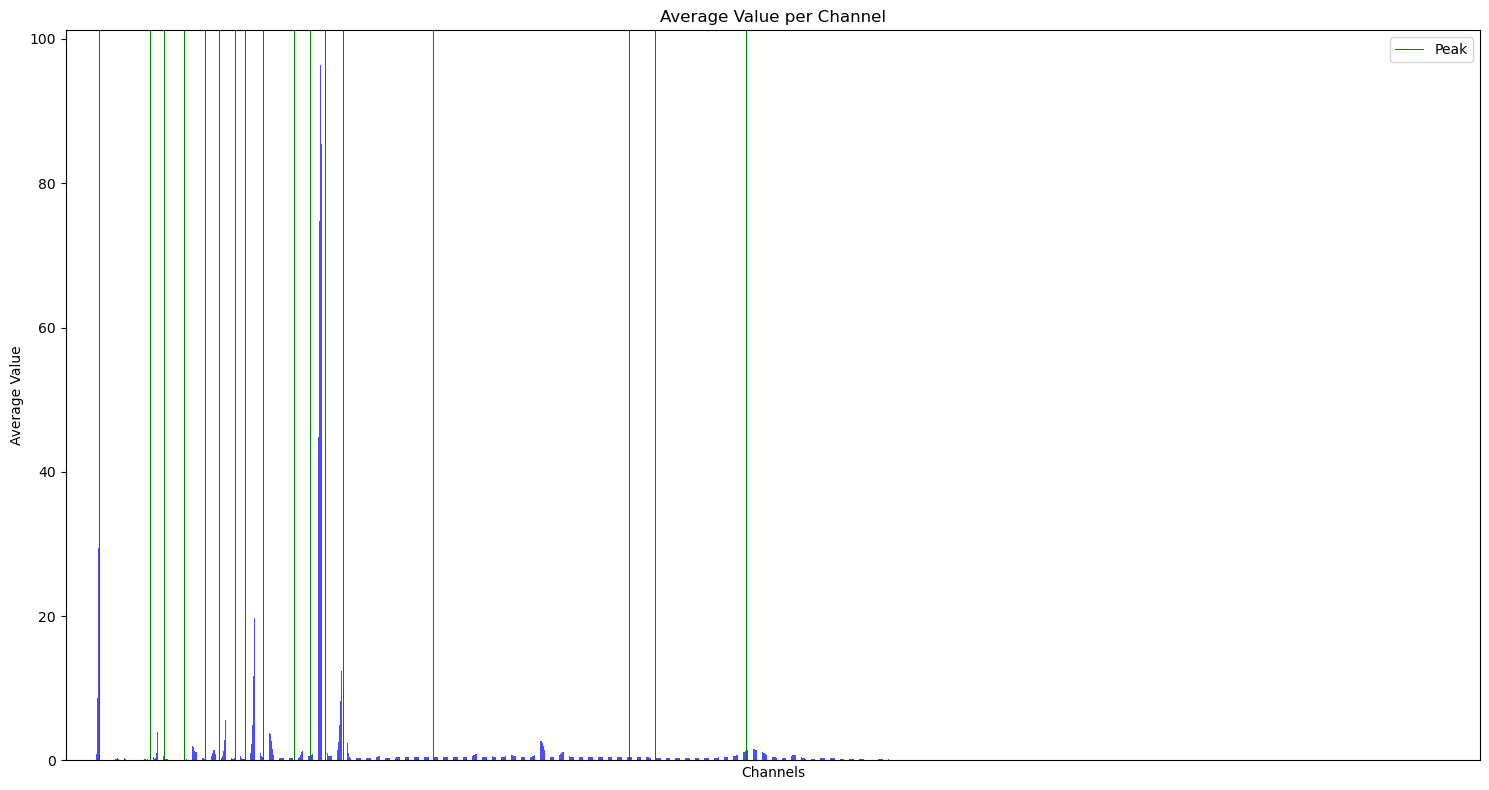

In [105]:
# Calculate the average for each channel
channel_average = df_channels.mean()

# Plot the average values for each channel
plt.figure(figsize=(15, 8))
ax = channel_average.plot(kind='bar', color='blue', alpha=0.7)
plt.xlabel('Channels')
plt.ylabel('Average Value')
plt.title('Average Value per Channel')
plt.xticks([])  # Remove x-axis labels for clarity

# Add vertical lines for the peaks from df_filtered
for peak in peak_positions:
    plt.axvline(x=peak, color='green', linestyle='-', linewidth=0.7, label='Peak' if peak == peak_positions[0] else "")

# Only display one "Peak" label in the legend for clarity
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.tight_layout()
plt.show()

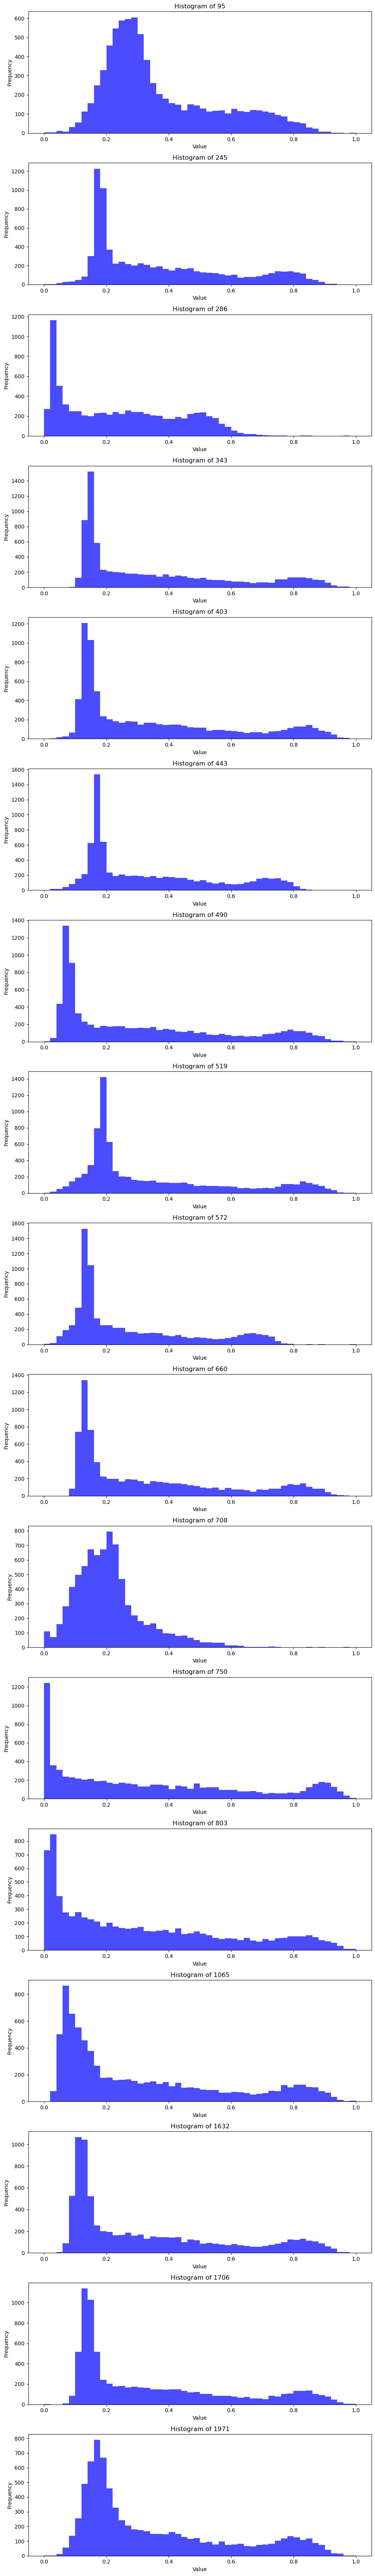

In [106]:
# Number of columns in df_filtered
num_cols = df_filtered.shape[1]

# Setting up the dimensions for our subplots
fig, axes = plt.subplots(nrows=num_cols, figsize=(10, 4 * num_cols))

for col, ax in zip(df_filtered.columns, axes):
    ax.hist(df_filtered[col], bins=50, color='blue', alpha=0.7)
    ax.set_title(f'Histogram of {col}')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()